# Medicine Recommendation System built with the help of Machine Learning 


The dataset link is given below :

https://www.kaggle.com/datasets/noorsaeed/medicine-recommendation-system-dataset 


The dataset contains six .csv files.



#### This is how we are going to make this Project. 


- With the help of **training.csv** file we are going to train and build our models. In this Project we are going to use Machine learning Algorithm provided bu sklearn.   

  
    
      
      



- After building the model we will choose our best model . This model is going to give the predicted disease on the basis of given symptoms. 




- All the other datasets depend on the predicted disease like the diet,workout,precautions,medicine.






- **This recommendation system is built on prediction of disease and matching the predicted disease with the records in other files and getting the matched result.**  





In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression

In [3]:
#importing the dataset 


df=pd.read_csv("Training.csv") 

df.head() 

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [5]:
### printing the dataset information .


print("The total number of rows and columns in this dataset is : ",df.shape) 


print("The total number of symptoms are ",(df.shape[1]-1)) 


print("The total number of unique prognosis are :",df["prognosis"].nunique()) 


df["prognosis"].unique()
 


The total number of rows and columns in this dataset is :  (4920, 133)
The total number of symptoms are  132
The total number of unique prognosis are : 41


array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [7]:
## looking at symptoms 

print(df.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


The counts  each prognosis : 
 prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B        

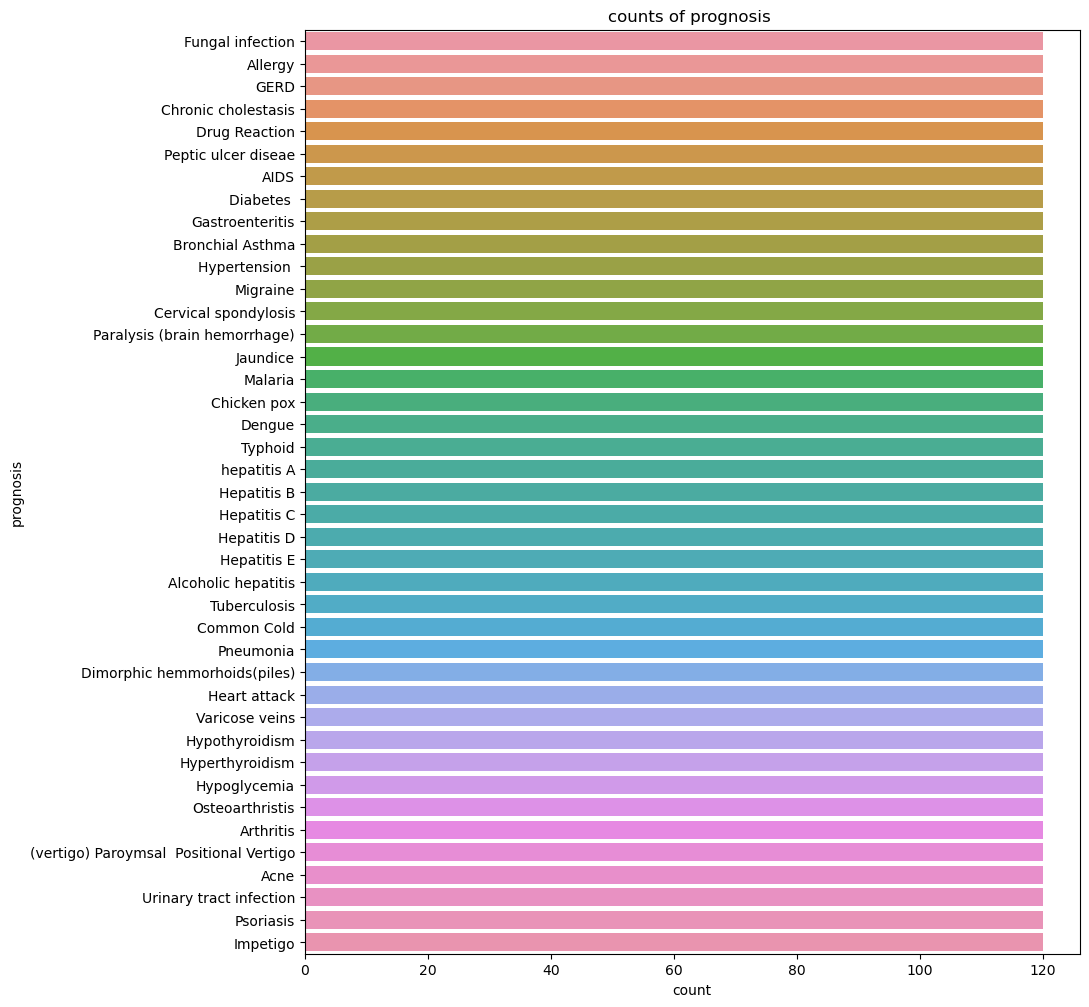

In [13]:
#Visualizing the prognosis feature
print("The counts  each prognosis : \n",df["prognosis"].value_counts())



plt.figure(figsize=(10,12)) 
sns.countplot(data=df,y="prognosis") 
plt.title("counts of prognosis ")
plt.show() 

 -  **The dataset is highly preprocessed and looking at the target feature we can say it is proper balanced also which is very good for building the model.** 

### Splitting Data into train and test and building and Evaluating the Models

In [4]:
## separating input and output variables 


#Input Variable
X=df.drop("prognosis",axis=1)  

#target variable  

y=df["prognosis"]

#label encoding our target feature 

label_encoder=LabelEncoder()

y=label_encoder.fit_transform(y) 




In [16]:
set(y)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40}

In [5]:
# doing the train test split 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)


X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4428, 132), (492, 132), (4428,), (492,))

SVC() Accuracy: 1.0


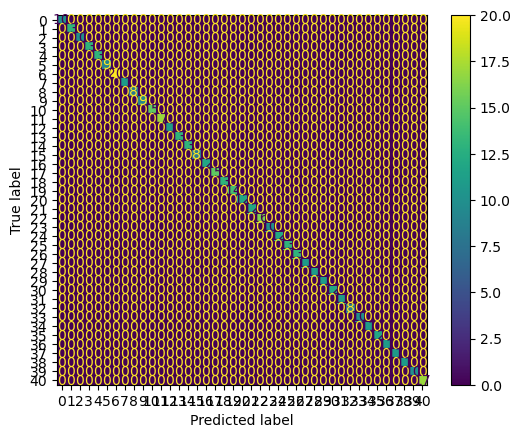

KNeighborsClassifier() Accuracy: 1.0


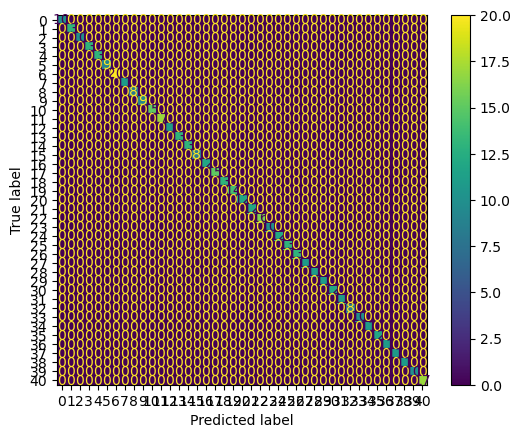

RandomForestClassifier() Accuracy: 1.0


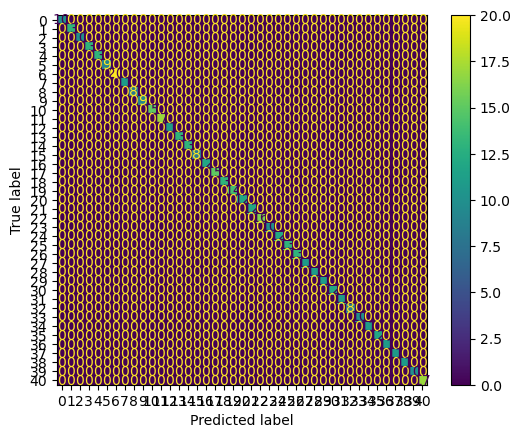

GradientBoostingClassifier() Accuracy: 1.0


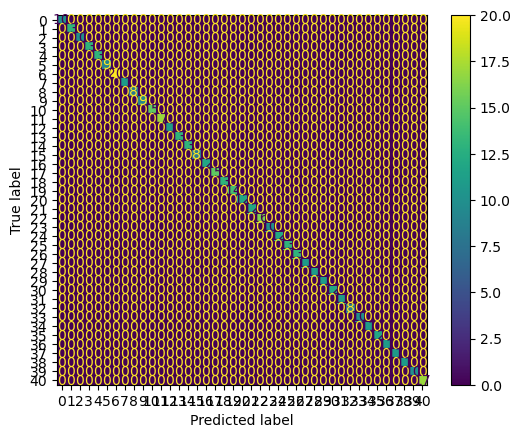

MultinomialNB() Accuracy: 1.0


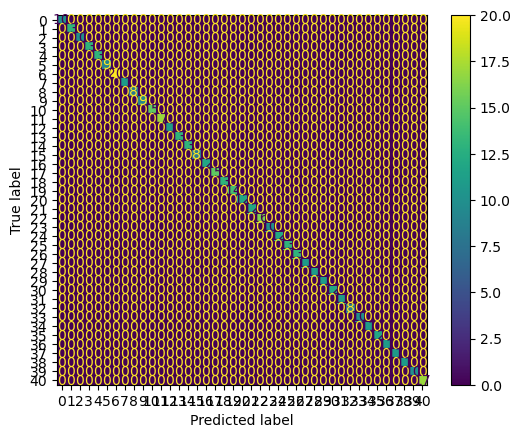

DecisionTreeClassifier() Accuracy: 1.0


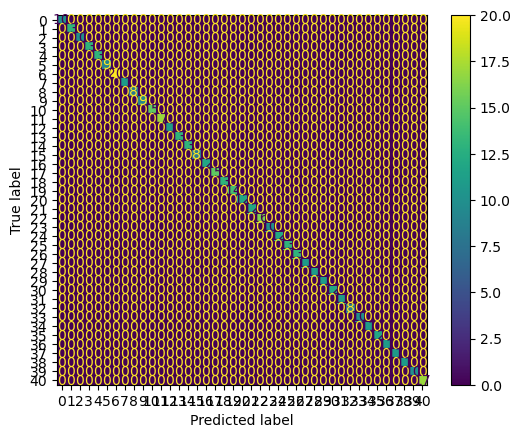

LogisticRegression() Accuracy: 1.0


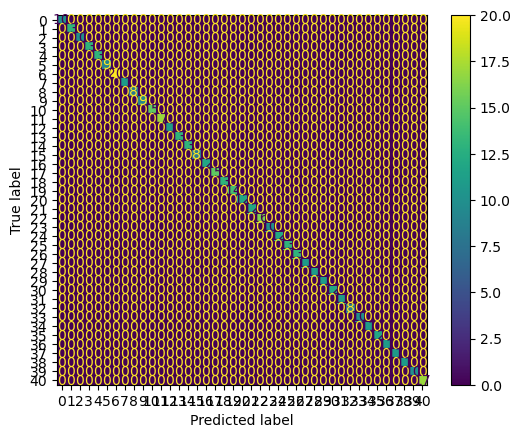

In [14]:
### Building models using different algorithm and checking their accuracy 

algo_list=[SVC(), KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),MultinomialNB(),DecisionTreeClassifier(),LogisticRegression()]




#iteraing through algo list and building the model,checking accuracy, confusion matrix 


for algo in algo_list:
    
    model=algo.fit(X_train,y_train) 
    
    prediction=model.predict(X_test) 
    
    accuracy = accuracy_score(y_test, prediction)
    print(f"{algo} Accuracy: {accuracy}") 
    
    cm=confusion_matrix(y_test,prediction)
    
    va=ConfusionMatrixDisplay(cm)
    va.plot()
    plt.show()
  

**Since Every Model is giving the accuracy 100 percent and except the diagonal elements all the other elements in the confusion matrix is zero so we can choose any of the model.** 

**Here I have chosen model built with Logistic regression.** 



### Building The Actual Model with Logistic Regression and Saving the Model 

In [17]:
#Building the model
regressor=LogisticRegression()

model= regressor.fit(X_train,y_train) 

prediction=model.predict(X_test)

print("Accuracy : ",accuracy_score(y_test,prediction)) 

print("Precision : ",precision_score(y_test,prediction,average=None))


print("Recall : ",recall_score(y_test,prediction,average=None)) 

Accuracy :  1.0
Precision :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
# save model
import pickle
#pickle.dump(model,open('lrg.pkl','wb'))

In [8]:
# load model
model= pickle.load(open('lrg.pkl','rb')) 

### Doing some manual testing on the model 

In [20]:
# test 1:
print("TEST 1")
print("predicted disease :",model.predict(X_test.iloc[12].values.reshape(1,-1)))
print("Actual Disease :", y_test[12])
print("==================================================")

# test 2:
print("TEST 2")
print("predicted disease :",model.predict(X_test.iloc[34].values.reshape(1,-1)))
print("Actual Disease :", y_test[34])
print("==================================================")

# test 3:
print("TEST 3")
print("predicted disease :",model.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])
print("==================================================")


TEST 1
predicted disease : [21]
Actual Disease : 21
TEST 2
predicted disease : [39]
Actual Disease : 39
TEST 3
predicted disease : [2]
Actual Disease : 2


C:\Users\ibteda azeem\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\ibteda azeem\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\ibteda azeem\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Utilising the related data  to make recommendations according to predicted disease  



In [9]:
desc_data=pd.read_csv("description.csv")
diet_data=pd.read_csv("diets.csv")
symp_data=pd.read_csv("Symptom-severity.csv")
prec_data=pd.read_csv("precautions_df.csv")
work_data=pd.read_csv("workout_df.csv")
med_data=pd.read_csv("medications.csv")


In [29]:
desc_data.head() 

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...


In [30]:
diet_data.head() 

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."


In [31]:
symp_data.head() 

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [32]:
prec_data.head() 

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [33]:
work_data.head() 

,Unnamed: 0.1,Unnamed: 0,disease,workout
0,0,0,Fungal infection,Avoid sugary foods
1,1,1,Fungal infection,Consume probiotics
2,2,2,Fungal infection,Increase intake of garlic
3,3,3,Fungal infection,Include yogurt in diet
4,4,4,Fungal infection,Limit processed foods


In [34]:
med_data.head() 

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [7]:
symp_data.head() 

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [10]:
symp_data["index"]=symp_data.index

symp_data.head() 

,Symptom,weight,index
0,itching,1,0
1,skin_rash,3,1
2,nodal_skin_eruptions,4,2
3,continuous_sneezing,4,3
4,shivering,5,4


In [11]:
symp_dict=dict(zip(symp_data["Symptom"],symp_data["index"])) 
symp_dict 

{'itching': 0,
 'skin_rash': 1,
 'nodal_skin_eruptions': 2,
 'continuous_sneezing': 3,
 'shivering': 4,
 'chills': 5,
 'joint_pain': 6,
 'stomach_pain': 7,
 'acidity': 8,
 'ulcers_on_tongue': 9,
 'muscle_wasting': 10,
 'vomiting': 11,
 'burning_micturition': 12,
 'spotting_urination': 13,
 'fatigue': 14,
 'weight_gain': 15,
 'anxiety': 16,
 'cold_hands_and_feets': 17,
 'mood_swings': 18,
 'weight_loss': 19,
 'restlessness': 20,
 'lethargy': 21,
 'patches_in_throat': 22,
 'irregular_sugar_level': 23,
 'cough': 24,
 'high_fever': 25,
 'sunken_eyes': 26,
 'breathlessness': 27,
 'sweating': 28,
 'dehydration': 29,
 'indigestion': 30,
 'headache': 31,
 'yellowish_skin': 32,
 'dark_urine': 33,
 'nausea': 34,
 'loss_of_appetite': 35,
 'pain_behind_the_eyes': 36,
 'back_pain': 37,
 'constipation': 38,
 'abdominal_pain': 39,
 'diarrhoea': 40,
 'mild_fever': 41,
 'yellow_urine': 42,
 'yellowing_of_eyes': 43,
 'acute_liver_failure': 44,
 'fluid_overload': 117,
 'swelling_of_stomach': 46,
 'swelle

In [17]:
disease_dict=dict(zip(range(len(label_encoder.classes_)),label_encoder.classes_)) 
disease_dict 

{0: '(vertigo) Paroymsal  Positional Vertigo',
 1: 'AIDS',
 2: 'Acne',
 3: 'Alcoholic hepatitis',
 4: 'Allergy',
 5: 'Arthritis',
 6: 'Bronchial Asthma',
 7: 'Cervical spondylosis',
 8: 'Chicken pox',
 9: 'Chronic cholestasis',
 10: 'Common Cold',
 11: 'Dengue',
 12: 'Diabetes ',
 13: 'Dimorphic hemmorhoids(piles)',
 14: 'Drug Reaction',
 15: 'Fungal infection',
 16: 'GERD',
 17: 'Gastroenteritis',
 18: 'Heart attack',
 19: 'Hepatitis B',
 20: 'Hepatitis C',
 21: 'Hepatitis D',
 22: 'Hepatitis E',
 23: 'Hypertension ',
 24: 'Hyperthyroidism',
 25: 'Hypoglycemia',
 26: 'Hypothyroidism',
 27: 'Impetigo',
 28: 'Jaundice',
 29: 'Malaria',
 30: 'Migraine',
 31: 'Osteoarthristis',
 32: 'Paralysis (brain hemorrhage)',
 33: 'Peptic ulcer diseae',
 34: 'Pneumonia',
 35: 'Psoriasis',
 36: 'Tuberculosis',
 37: 'Typhoid',
 38: 'Urinary tract infection',
 39: 'Varicose veins',
 40: 'hepatitis A'}

In [18]:


#creating the prediction function 


def get_prediction(symptoms):
    input_vector = np.zeros(len(symp_dict))
    for s in symptoms:
        input_vector[symp_dict[s]]=1 
    input_vector=input_vector.reshape(1,-1)
    prediction=model.predict(input_vector)[0]
    
    disease=disease_dict[prediction]
   
            
    return disease 




#creating the recommendor function 

def recommendor(predicted_disease):
    
    
    desc = desc_data[desc_data['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    prec = prec_data[prec_data['Disease'] ==predicted_disease][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    prec = [col for col in prec.values]

    med = med_data[med_data['Disease'] == predicted_disease]['Medication']
    med = [med for med in med.values]

    diet = diet_data[diet_data['Disease'] == predicted_disease]['Diet']
    diet = [di for di in diet.values]

    work = work_data[work_data['disease'] == predicted_disease] ['workout']


    return desc,prec,med,diet,work  

In [19]:
get_prediction(["skin_rash","joint_pain"])

C:\Users\ibteda azeem\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Psoriasis'

In [16]:
recommendor('Psoriasis') 

('Psoriasis is a chronic skin condition characterized by red, itchy, and scaly patches.',
 [array(['wash hands with warm soapy water', 'stop bleeding using pressure',
         'consult doctor', 'salt baths'], dtype=object)],
 ["['Topical treatments', 'Phototherapy', 'Systemic medications', 'Biologics', 'Coal tar']"],
 ["['Psoriasis Diet', 'Anti-Inflammatory Diet', 'Omega-3-rich foods', 'Fruits and vegetables', 'Whole grains']"],
 390                 Consume anti-inflammatory foods
 391                     Include omega-3 fatty acids
 392                     Include vitamin D analogues
 393                       Limit alcohol consumption
 394                                   Stay hydrated
 395               Consult a healthcare professional
 396                           Limit processed foods
 397                  Follow medical recommendations
 398                                   Manage stress
 399    Consider phototherapy under medical guidance
 Name: workout, dtype: object)

In [40]:
## 

def print_results(symptoms):
    
    predicted_disease=get_prediction(symptoms) 
    desc,prec,med,diet,work=recommendor(predicted_disease) 
    
    print("PREDICTED DISEASE : ", predicted_disease)
    print("=================DISEASE DESCRIPTION===============") 
    
    print(desc.strip()) 
    
    print("==========PRECAUTIONS===================")
    prec=prec[0]
   
    for i in  prec:
        print(" * - ",i) 
        
    print("===========MEDICATIONS===========")
    
    med=med[0]
    med=eval(med)
    
    for i in med:
        print("* - ",i) 
        
    print("==============DIET===================") 
    
    diet=diet[0]
    
    diet=eval(diet)
    for i in diet:
        print("* - ",i) 
    
    print("===========WORKOUT/LIFESTYLE SUGGESTIONS===============") 
    
    for i in work :
        print("* -",i) 
        
    

In [41]:
print_results(["skin_rash","joint_pain"]) 

PREDICTED DISEASE :  Psoriasis
=================DISEASE DESCRIPTION===============
Psoriasis is a chronic skin condition characterized by red, itchy, and scaly patches.
==========PRECAUTIONS===================
 * -  wash hands with warm soapy water
 * -  stop bleeding using pressure
 * -  consult doctor
 * -  salt baths
===========MEDICATIONS===========
* -  Topical treatments
* -  Phototherapy
* -  Systemic medications
* -  Biologics
* -  Coal tar
==============DIET===================
* -  Psoriasis Diet
* -  Anti-Inflammatory Diet
* -  Omega-3-rich foods
* -  Fruits and vegetables
* -  Whole grains
===========WORKOUT/LIFESTYLE SUGGESTIONS===============
* - Consume anti-inflammatory foods
* - Include omega-3 fatty acids
* - Include vitamin D analogues
* - Limit alcohol consumption
* - Stay hydrated
* - Consult a healthcare professional
* - Limit processed foods
* - Follow medical recommendations
* - Manage stress
* - Consider phototherapy under medical guidance


C:\Users\ibteda azeem\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
